# 股票数据读取与可视化

### 股票数据获取

In [1]:
#获取股票基本数据
import tushare as ts
df = ts.get_k_data('000002', start='2009-01-01', end='2019-01-01')
df.head()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,date,open,close,high,low,volume,code
0,2009-01-05,-0.582,-0.462,-0.462,-0.682,936048.88,000002
1,2009-01-06,-0.482,-0.262,-0.212,-0.552,1216831.18,000002
2,2009-01-07,-0.232,-0.302,-0.102,-0.302,834829.31,000002
3,2009-01-08,-0.412,-0.262,-0.162,-0.482,837661.70,000002
4,2009-01-09,-0.262,-0.272,-0.152,-0.352,626815.66,000002


In [2]:
# #将股票数据保存到Excel文件中，不保留原行索引
# df.to_excel('股价数据.xlsx', index=False)

### 绘制股价走势图

In [3]:
#将日期设置为行索引
df.set_index('date', inplace=True)
df.head()

,open,close,high,low,volume,code
date,,,,,,
2009-01-05,-0.582,-0.462,-0.462,-0.682,936048.88,000002
2009-01-06,-0.482,-0.262,-0.212,-0.552,1216831.18,000002
2009-01-07,-0.232,-0.302,-0.102,-0.302,834829.31,000002
2009-01-08,-0.412,-0.262,-0.162,-0.482,837661.70,000002
2009-01-09,-0.262,-0.272,-0.152,-0.352,626815.66,000002


<AxesSubplot:title={'center':'万科股价走势图'}, xlabel='date'>

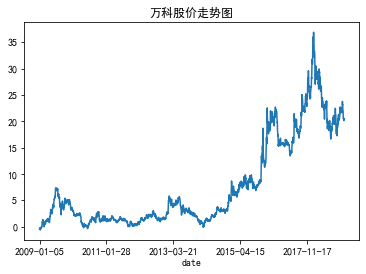

In [4]:
#以收盘价绘制折线图,默认以行索引为横坐标
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
df['close'].plot(title='万科股价走势图')    

### 使用matplotlib绘图

In [5]:
# # 通过Tushare库获取股价数据
# import tushare as ts
# df = ts.get_k_data('000002', start='2009-01-01', end='2019-01-01')

# # 要注意的细节：调整日期格式使得横坐标显示清晰
# from datetime import datetime
# df['date'] = df['date'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))

# # 绘制折线图
# import matplotlib.pyplot as plt
# plt.plot(df['date'], df['close'])
# plt.show()

# 股票K线图绘制

In [6]:
import tushare as ts
import matplotlib.pyplot as plt
import mpl_finance as mpf
import seaborn as sns
sns.set()

C:\Users\CHERISH\anaconda3\envs\shangyeanlishizhan\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


### 股票数据获取

In [7]:
#通过Tushare库获取股票基本数据
df = ts.get_k_data('000002','2019-06-01', '2019-09-30')
df.head()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,date,open,close,high,low,volume,code
99,2019-06-03,23.498,23.128,23.708,22.968,317567.0,000002
100,2019-06-04,23.158,22.988,23.228,22.938,203260.0,000002
101,2019-06-05,23.328,23.718,23.968,23.318,576164.0,000002
102,2019-06-06,23.698,23.808,23.978,23.608,333792.0,000002
103,2019-06-10,23.978,24.498,24.738,23.858,527547.0,000002


### 日期格式调整及表格转换

In [8]:
from matplotlib.pylab import date2num
import datetime

# 对tushare获取到的日期数据转换成candlestick_ohlc()函数可读取的数字格式
def date_to_num(dates):
    num_time = []
    for date in dates:
        date_time = datetime.datetime.strptime(date,'%Y-%m-%d')
        num_date = date2num(date_time)
        num_time.append(num_date)
    return num_time

# 将DataFrame转换为二维数组，并利用date_to_num()函数转换日期
df_arr = df.values  # 将DataFrame格式的数据，转换为array二维数组
df_arr[:,0] = date_to_num(df_arr[:,0])

df_arr[0:5]

array([[18050.0, 23.498, 23.128, 23.708, 22.968, 317567.0, '000002'],
       [18051.0, 23.158, 22.988, 23.228, 22.938, 203260.0, '000002'],
       [18052.0, 23.328, 23.718, 23.968, 23.318, 576164.0, '000002'],
       [18053.0, 23.698, 23.808, 23.978, 23.608, 333792.0, '000002'],
       [18057.0, 23.978, 24.498, 24.738, 23.858, 527547.0, '000002']],
      dtype=object)

### 绘制K线图

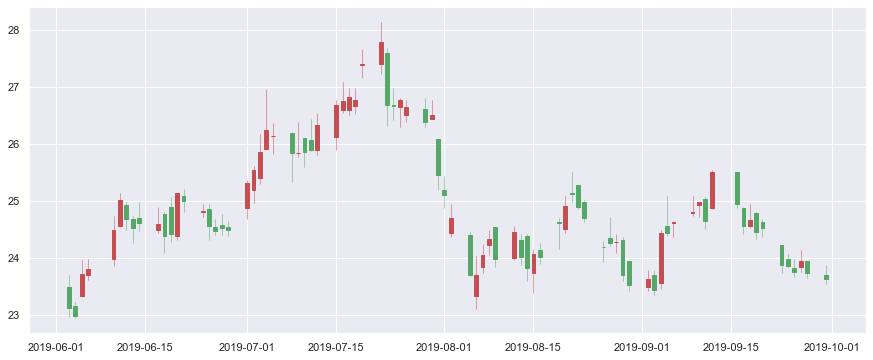

In [9]:
fig, ax = plt.subplots(figsize=(15,6))
mpf.candlestick_ochl(ax, df_arr, width=0.6, colorup='r', colordown='g', alpha=1.0)
plt.grid(True)  # 绘制网格
ax.xaxis_date()  # 设置x轴的刻度为日期

### 添加均线图

In [10]:
df['MA5'] = df['close'].rolling(5).mean()
df['MA10'] = df['close'].rolling(10).mean()

df.head(15)

,date,open,close,high,low,volume,code,MA5,MA10
99,2019-06-03,23.498,23.128,23.708,22.968,317567.0,000002,NaN,NaN
100,2019-06-04,23.158,22.988,23.228,22.938,203260.0,000002,NaN,NaN
101,2019-06-05,23.328,23.718,23.968,23.318,576164.0,000002,NaN,NaN
102,2019-06-06,23.698,23.808,23.978,23.608,333792.0,000002,NaN,NaN
103,2019-06-10,23.978,24.498,24.738,23.858,527547.0,000002,23.628,NaN
104,2019-06-11,24.558,25.018,25.138,24.538,449630.0,000002,24.006,NaN
105,2019-06-12,24.928,24.688,24.978,24.498,269372.0,000002,24.346,NaN
106,2019-06-13,24.688,24.518,24.738,24.268,250431.0,000002,24.506,NaN
107,2019-06-14,24.698,24.618,24.978,24.468,311417.0,000002,24.668,NaN
108,2019-06-17,24.488,24.598,24.888,24.438,171672.0,000002,24.688,24.158


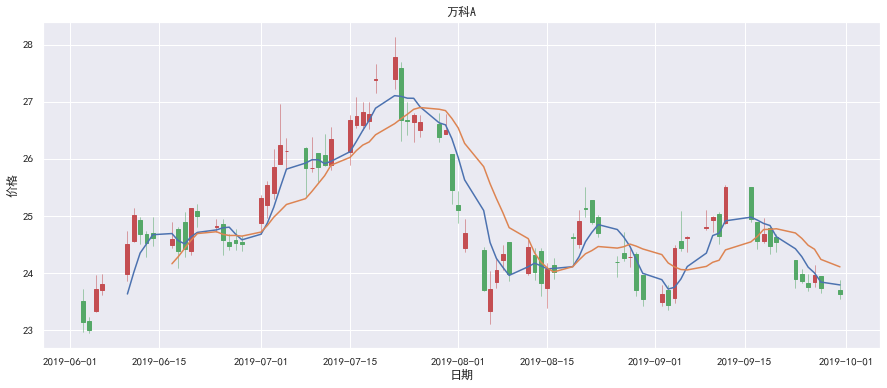

In [11]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签

fig, ax = plt.subplots(figsize=(15,6))

mpf.candlestick_ochl(ax, df_arr, width=0.6, colorup='r', colordown='g', alpha=1.0) 
plt.plot(df_arr[:,0], df['MA5'])
plt.plot(df_arr[:,0], df['MA10'])

plt.grid(True)  # 绘制网格

plt.title('万科A')
plt.xlabel('日期')
plt.ylabel('价格')

ax.xaxis_date ()

### 添加每日成交量柱形图

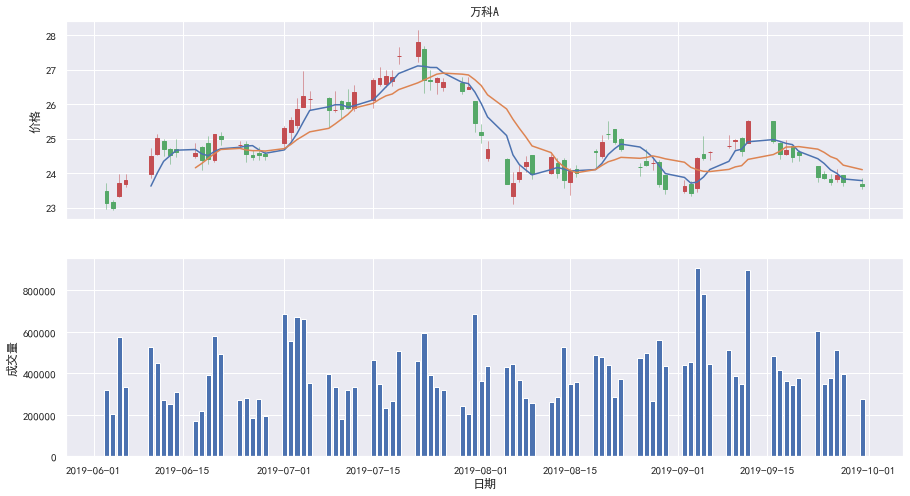

In [12]:
#sharex=True：子图共用一个坐标轴
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15,8))
ax1, ax2 = axes.flatten()

# 绘制第一张子图：K线图和均线图
mpf.candlestick_ochl(ax1, df_arr, width=0.6, colorup = 'r', colordown = 'g', alpha=1.0)

ax1.plot(df_arr[:,0], df['MA5'])  # 绘制5日均线
ax1.plot(df_arr[:,0], df['MA10'])  # 绘制10日均线

ax1.set_title('万科A')  # 设置子图标题
ax1.set_ylabel('价格')  # 设置子图Y轴标签
ax1.grid(True)
ax1.xaxis_date()

# 绘制第二张子图：成交量图
ax2.bar(df_arr[:,0], df_arr[:,5])  # 绘制成交量柱状图
ax2.set_xlabel('日期')  # 设置子图X轴标签
ax2.set_ylabel('成交量')  # 设置子图Y轴标签
ax2.grid(True)
ax2.xaxis_date()